In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# File to load
h5_file = "data/phantom_01/phantom_1_fd_scan.h5"
print(f"📂 Using file: {h5_file}")

📂 Using file: data/phantom_01/phantom_1_fd_scan.h5


In [9]:
with h5py.File(h5_file, "r") as f:
    amplitude = f["log_amplitude"][:]
    phase = f["phase"][:]
    src_pos = f["source_pos"][:]
    det_pos = f["det_pos"][:]
    ground_truth = f["ground_truth"][:]

print(f"""
✅ Data loaded:
  - amplitude: {amplitude.shape}
  - phase    : {phase.shape}
  - source_pos: {src_pos.shape}
  - det_pos  : {det_pos.shape}
  - ground_truth: {ground_truth.shape}
""")



✅ Data loaded:
  - amplitude: (256, 3)
  - phase    : (256, 3)
  - source_pos: (256, 3)
  - det_pos  : (256, 3, 3)
  - ground_truth: (50, 50, 24, 2)



In [10]:
print("📊 Statistics overview:")
print(f"Amplitude  min={amplitude.min():.4f} max={amplitude.max():.4f} mean={amplitude.mean():.4f} std={amplitude.std():.4f}")
print(f"Phase      min={phase.min():.4f} max={phase.max():.4f} mean={phase.mean():.4f} std={phase.std():.4f}")

mua_vals = ground_truth[...,0]
musp_vals = ground_truth[...,1]

print(f"μₐ (absorp) min={mua_vals.min():.5f} max={mua_vals.max():.5f} mean={mua_vals.mean():.5f} std={mua_vals.std():.5f}")
print(f"μ′s (scatt) min={musp_vals.min():.5f} max={musp_vals.max():.5f} mean={musp_vals.mean():.5f} std={musp_vals.std():.5f}")

📊 Statistics overview:
Amplitude  min=-18.4207 max=-9.4344 mean=-12.4129 std=2.0798
Phase      min=1457.6594 max=4679.4065 mean=2447.5137 std=666.4844
μₐ (absorp) min=0.00610 max=0.01961 mean=0.00658 std=0.00221
μ′s (scatt) min=0.95555 max=2.36558 mean=1.02433 std=0.28212


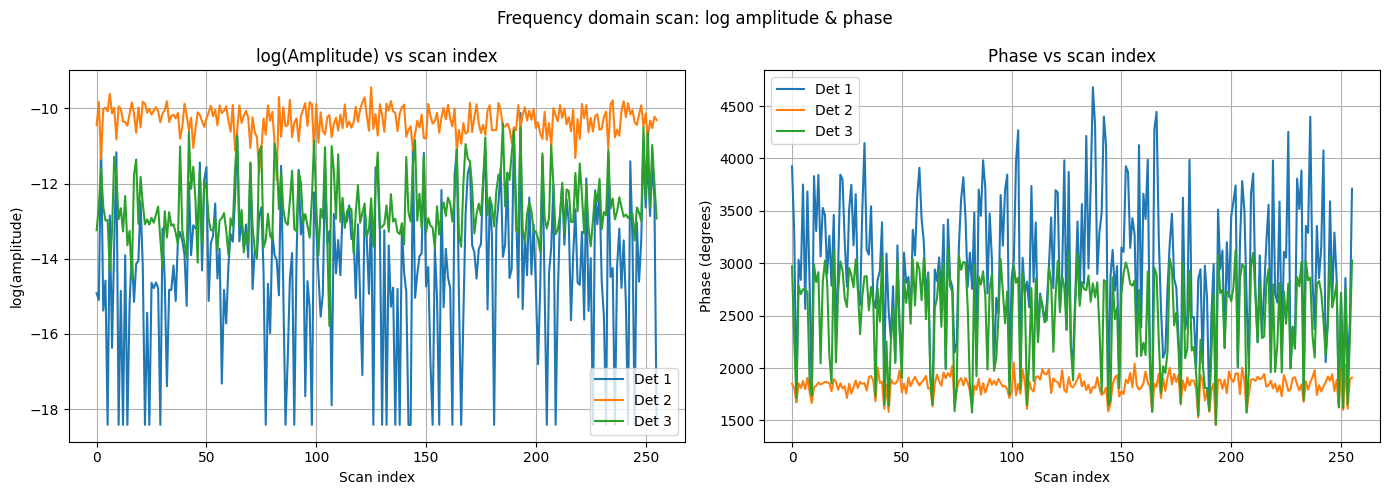

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
for d in range(amplitude.shape[1]):
    axs[0].plot(amplitude[:,d], label=f"Det {d+1}")
    axs[1].plot(phase[:,d], label=f"Det {d+1}")

axs[0].set_title("log(Amplitude) vs scan index")
axs[0].set_ylabel("log(amplitude)")
axs[0].set_xlabel("Scan index")
axs[0].grid(True)
axs[0].legend()

axs[1].set_title("Phase vs scan index")
axs[1].set_ylabel("Phase (degrees)")
axs[1].set_xlabel("Scan index")
axs[1].grid(True)
axs[1].legend()

plt.suptitle("Frequency domain scan: log amplitude & phase")
plt.tight_layout()
plt.show()

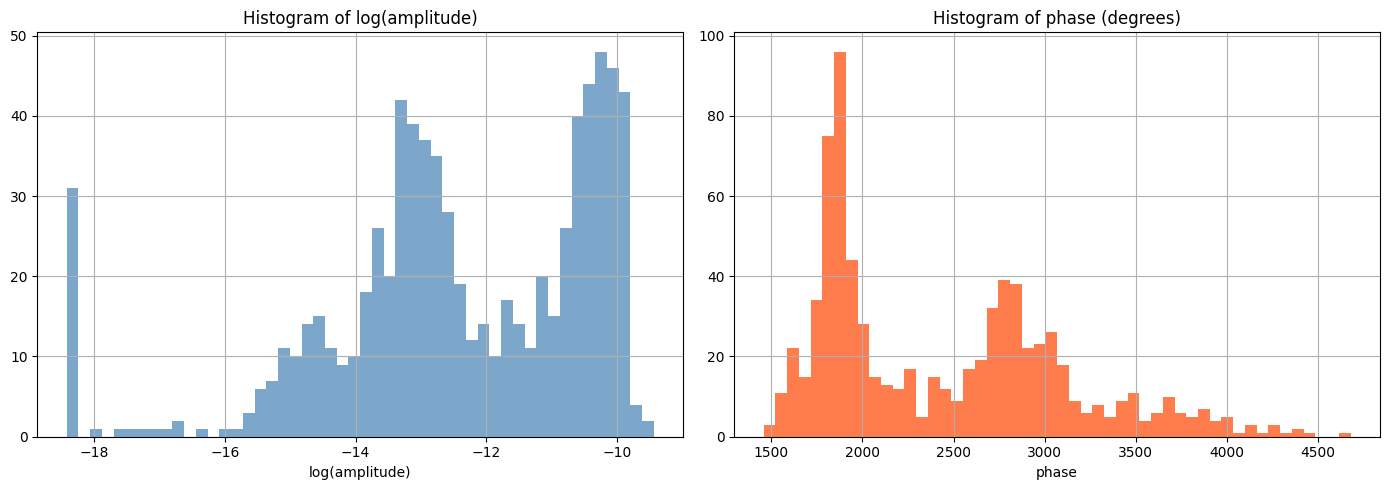

In [21]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
axs[0].hist(amplitude.flatten(), bins=50, color='steelblue', alpha=0.7)
axs[0].set_title("Histogram of log(amplitude)")
axs[0].set_xlabel("log(amplitude)")
axs[0].grid(True)

axs[1].hist(phase.flatten(), bins=50, color='orangered', alpha=0.7)
axs[1].set_title("Histogram of phase (degrees)")
axs[1].set_xlabel("phase")
axs[1].grid(True)

plt.tight_layout()
plt.show()

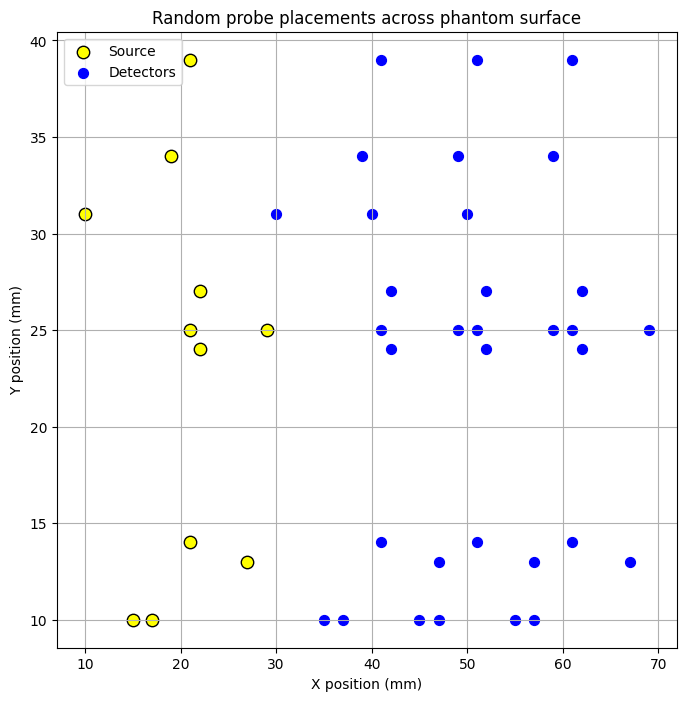

In [17]:
plt.figure(figsize=(8,8))
for i in range(0, len(src_pos), len(src_pos)//10):  # sample 10 positions
    plt.scatter(*src_pos[i,:2], color='yellow', edgecolor='black', s=80, label='Source' if i==0 else "")
    plt.scatter(det_pos[i,:,0], det_pos[i,:,1], color='blue', s=50, label='Detectors' if i==0 else "")
plt.title("Random probe placements across phantom surface")
plt.xlabel("X position (mm)")
plt.ylabel("Y position (mm)")
plt.legend()
plt.grid(True)
plt.show()

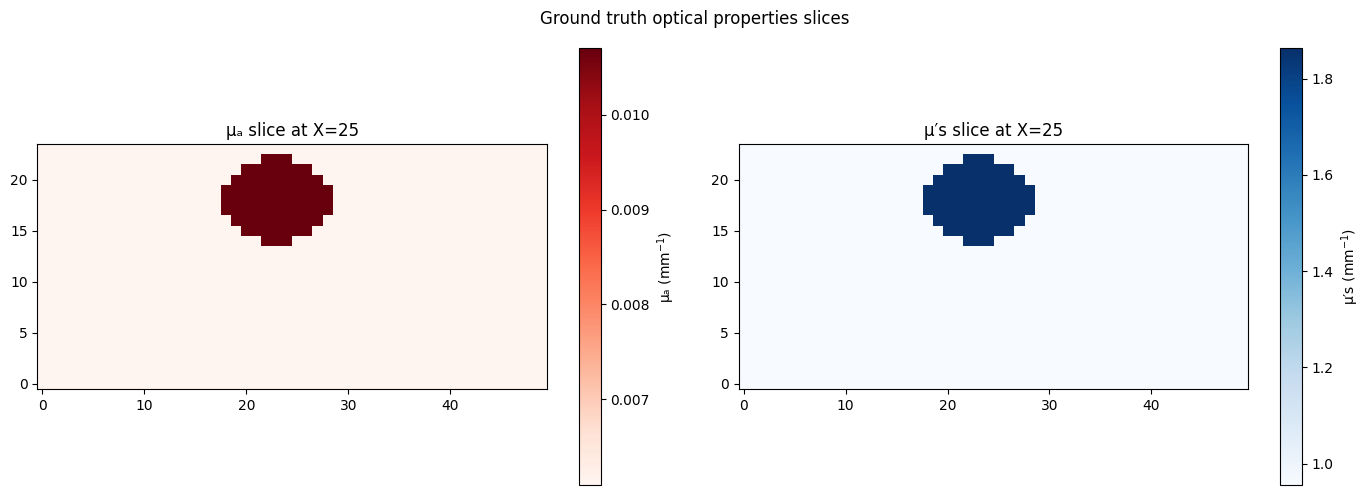

In [ ]:
ix = ground_truth.shape[0]//2
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(ground_truth[ix,:,:,0].T, origin='lower', cmap='Reds')
plt.title(f"μₐ slice at X={ix}")
plt.colorbar(label="μₐ (mm$^{-1}$)")

plt.subplot(1,2,2)
plt.imshow(ground_truth[ix,:,:,1].T, origin='lower', cmap='Blues')
plt.title(f"μ′s slice at X={ix}")
plt.colorbar(label="μ′s (mm$^{-1}$)")

plt.suptitle("Ground truth optical properties slices")
plt.tight_layout()
plt.show()

In [22]:
assert not np.isnan(amplitude).any(), "NaNs found in log amplitude!"
assert not np.isnan(phase).any(), "NaNs found in phase!"
assert not np.isnan(ground_truth).any(), "NaNs found in ground truth!"

print("🎉 All checks passed. Data is valid for training or further analysis.")

🎉 All checks passed. Data is valid for training or further analysis.
